In [ ]:
def plot_attention_map(model_param, opt_param):
    directory = get_directory(opt_param['lr'], 
                            opt_param['dataset_name'],
                            opt_param['loss'],
                            opt_param['opt'], 
                            opt_param['model_name'], 
                            opt_param['momentum'], 
                            opt_param['weight_decay'], 
                            opt_param['batch_size'], 
                            opt_param['epochs'], 
                            multi_run = False,
                            **model_param
                            )
    print(directory)
    with open(f'../{directory}eval_graphs.pk', 'rb') as f:
        eval_graphs = pickle.load(f)
    
    rows, cols = 1, 2
    #rows, cols = (len(epochs) - 1) // 6 + 1, min(len(epochs), 6)
    fig, axs = plt.subplots(rows,cols, figsize=(cols*2.5, rows*2))
    ax = axs[0]
    ax.imshow(eval_graphs.test_img[0][0])

In [ ]:
! python main.py --dataset cifar --model dino_vit_small --loss CrossEntropyLoss --opt sgd --lr 0.0 --epoch 0 --analysis attention_map --batch_size 128 --momentum 0.0 --weight_decay 0 --no_train --do_eval --vit_patch_size 16

/home/lucmon/lucmon/anaconda3/envs/mlopt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


results/cifar/CrossEntropyLoss/sgd/dino_vit_small/patch_size_16/lr_0.0/moment_0.0/wd_0.0/batch_size_128/epoch_0/run_0/
[0]


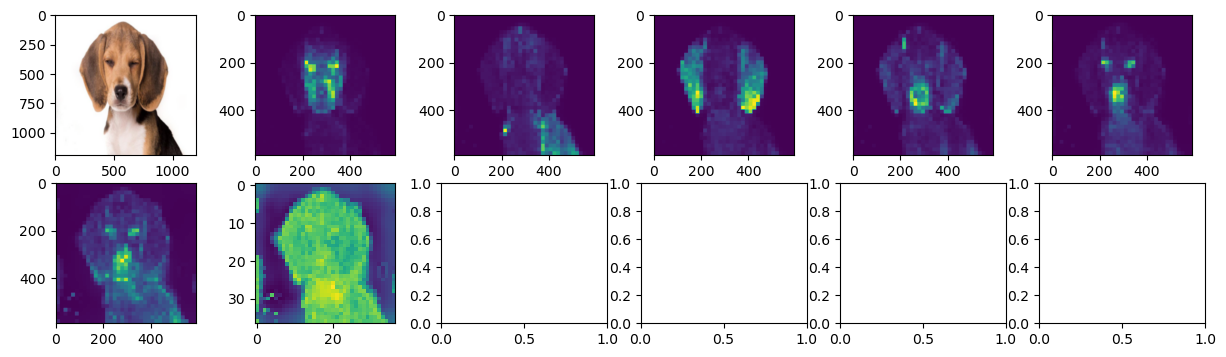

In [1]:
from plot_functions import plot_attention_map
lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.0, "cifar", 'CrossEntropyLoss', 0.0, 0.0, 128, 8, 0
model_name = "dino_vit_small"
model_param = {"patch_size": 16}
opt_param = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

raw_image, attention_maps, output_norm = plot_attention_map(model_param, opt_param, depths=None)


In [13]:
np.max(np.array(output_norm))

95.16881561279297

(array([3.0336e+05, 1.7408e+04, 1.1008e+04, 6.6560e+03, 5.6320e+03,
        3.3280e+03, 1.7920e+03, 5.1200e+02, 5.1200e+02, 2.5600e+02]),
 array([8.60000091e-06, 1.35670661e-03, 2.70481315e-03, 4.05291980e-03,
        5.40102599e-03, 6.74913265e-03, 8.09723884e-03, 9.44534596e-03,
        1.07934522e-02, 1.21415593e-02, 1.34896655e-02]),
 <BarContainer object of 10 artists>)

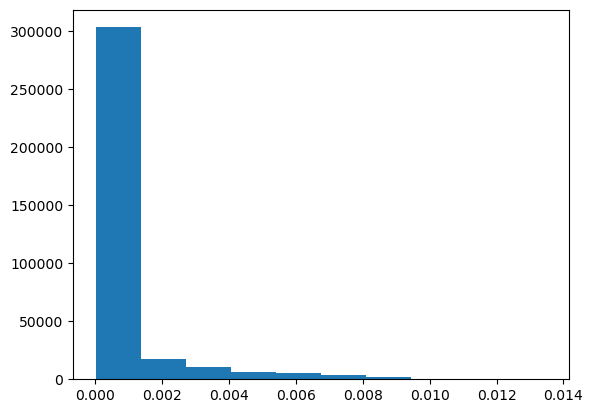

In [2]:
import numpy as np
np.sum(attention_maps[0])
np.max(attention_maps[0])
import matplotlib.pyplot as plt
plt.hist(attention_maps[0].reshape(-1))

In [ ]:
! python main.py --dataset cifar --model dinov2_vit_base --loss CrossEntropyLoss --opt sgd --lr 0.0 --epoch 0 --analysis attention_map --batch_size 128 --momentum 0.0 --weight_decay 0.0 --no_train --do_eval --vit_patch_size 14

/home/lucmon/lucmon/anaconda3/envs/mlopt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


results/cifar/CrossEntropyLoss/sgd/dinov2_vit_base/patch_size_14/register_0/lr_0.0/moment_0.0/wd_0.0/batch_size_128/epoch_0/run_0/
[ 0  1  2  3  4  5  6  7  8  9 10 11]


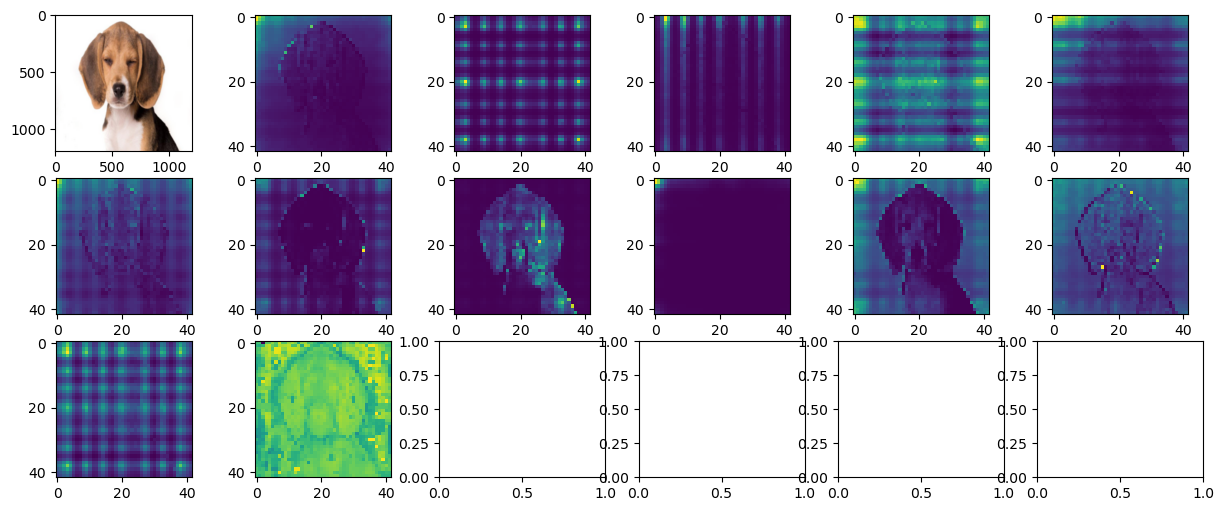

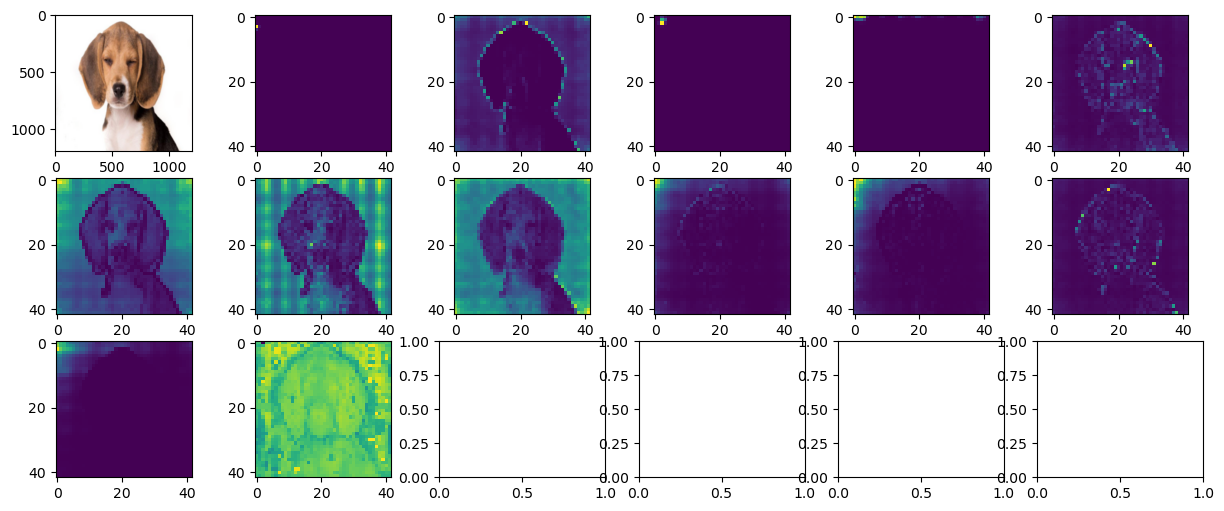

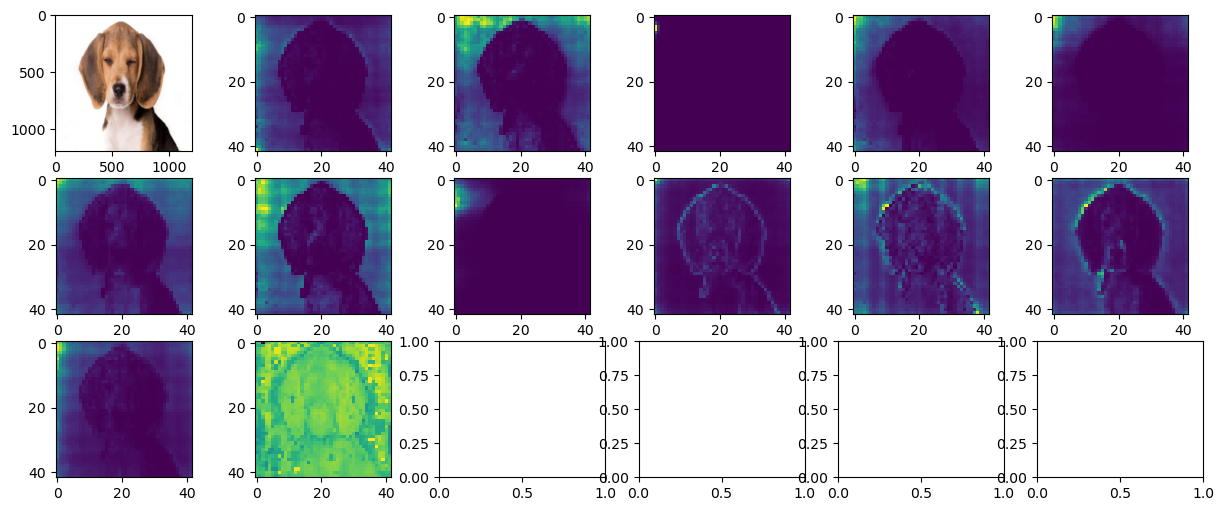

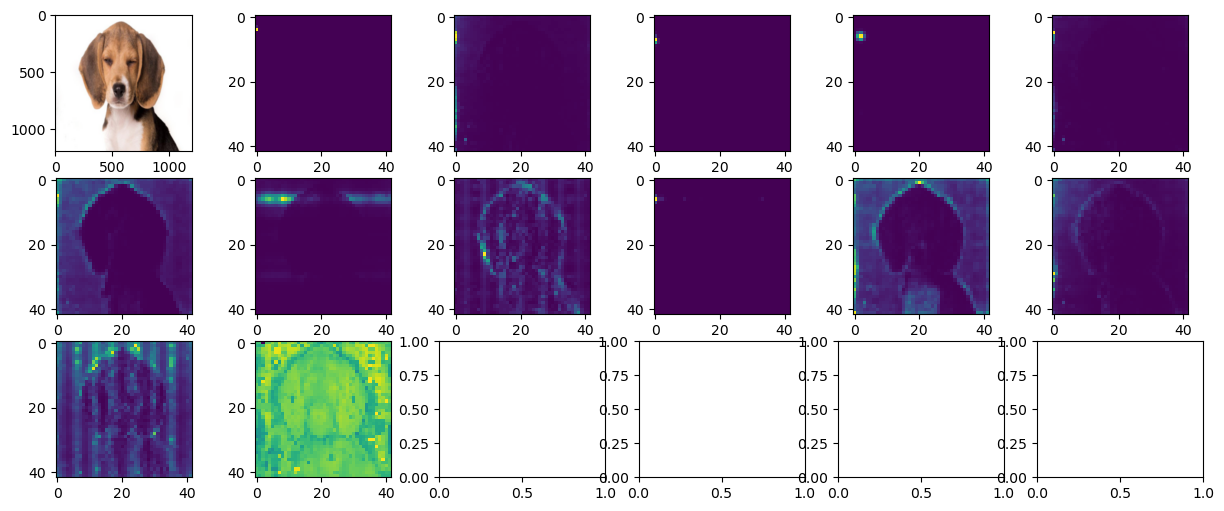

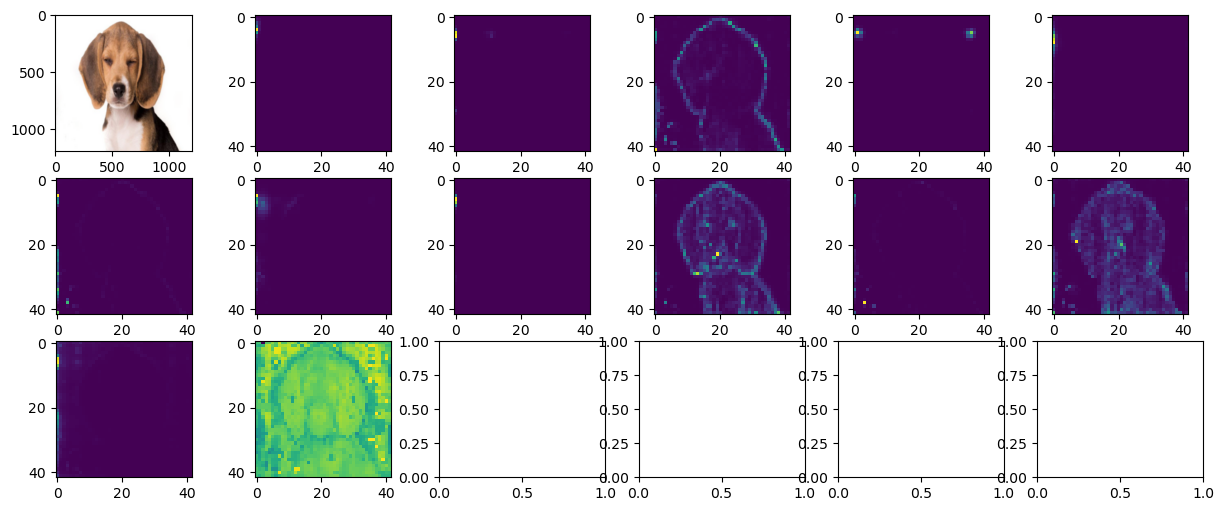

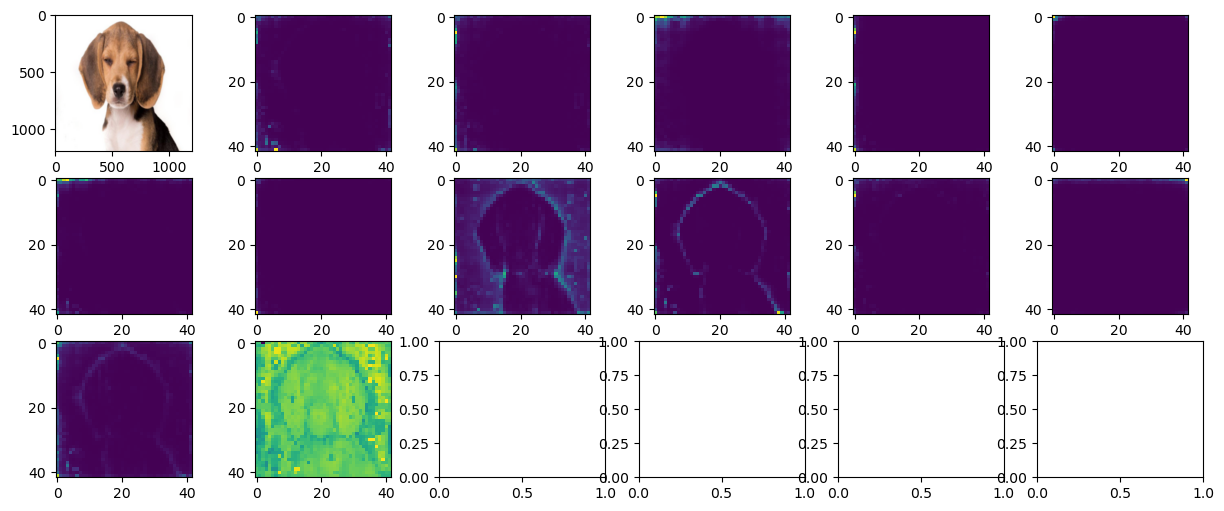

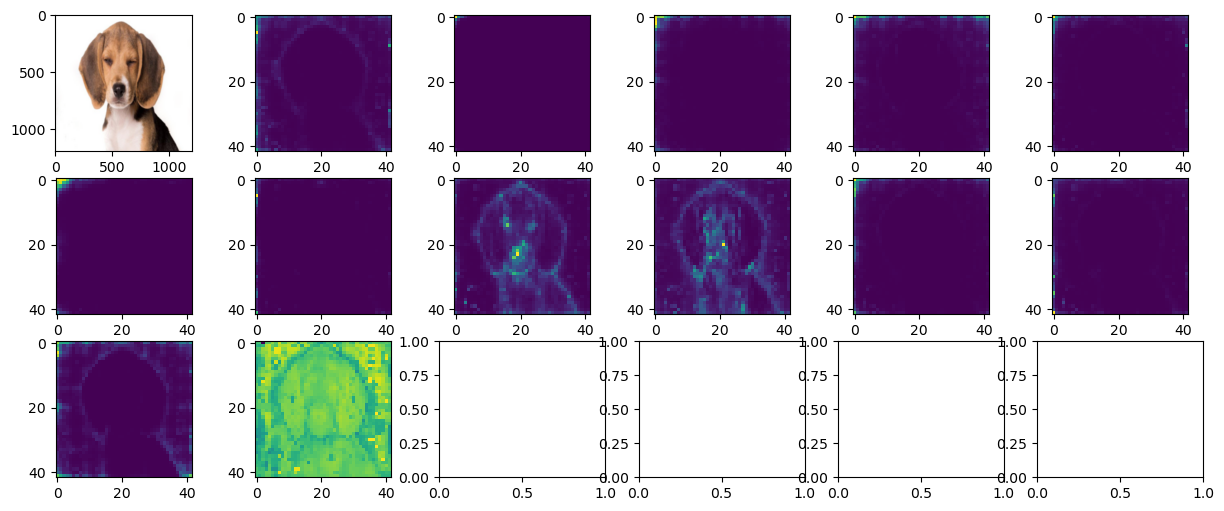

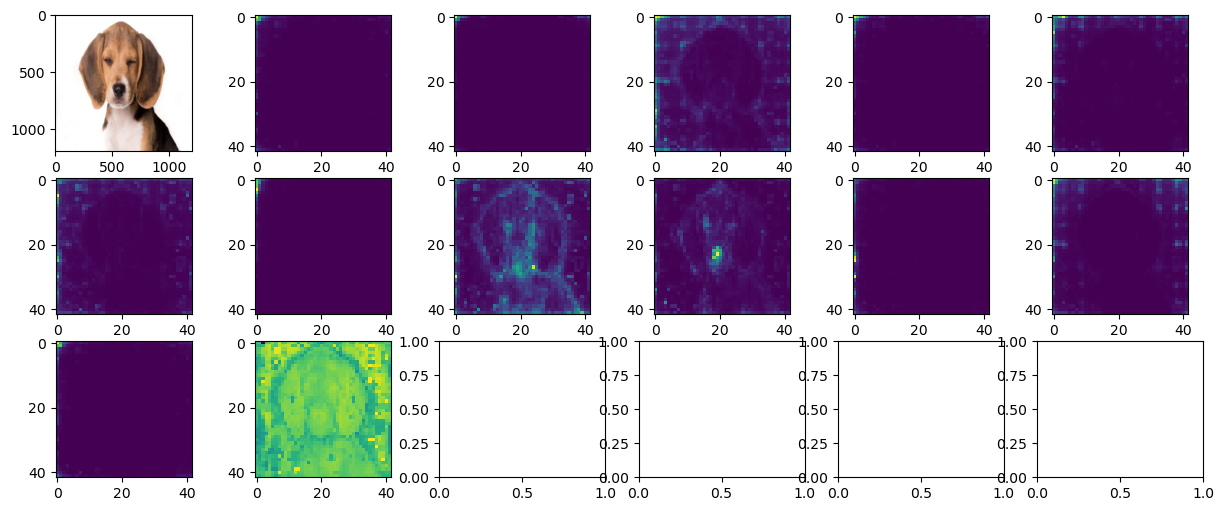

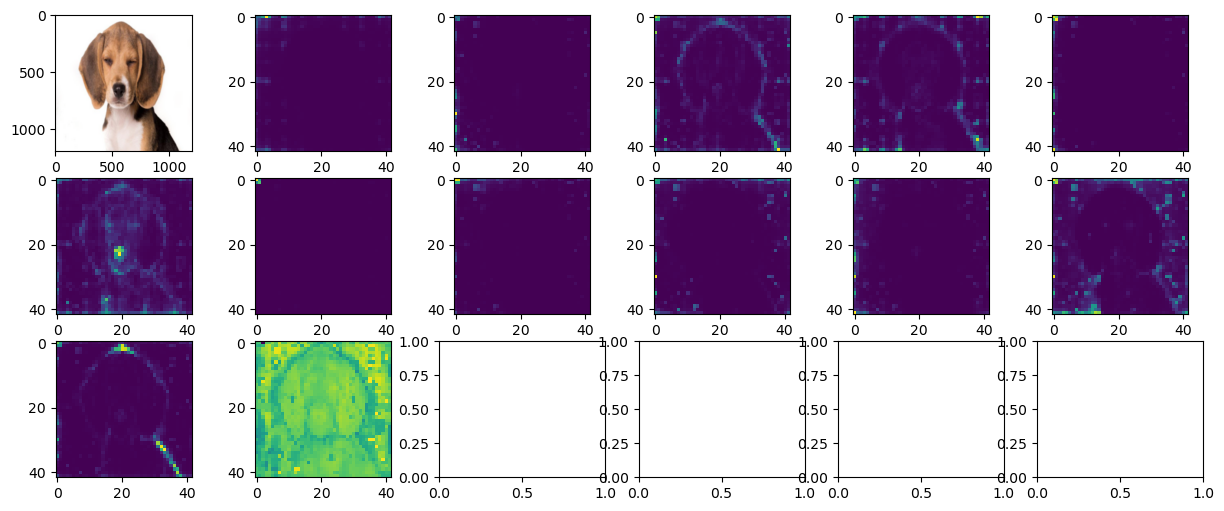

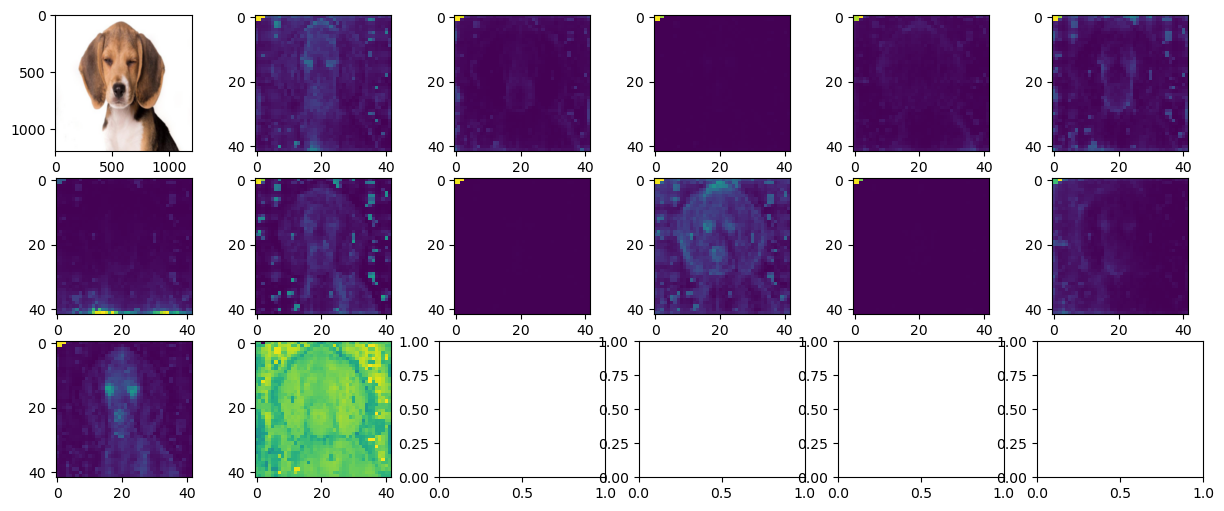

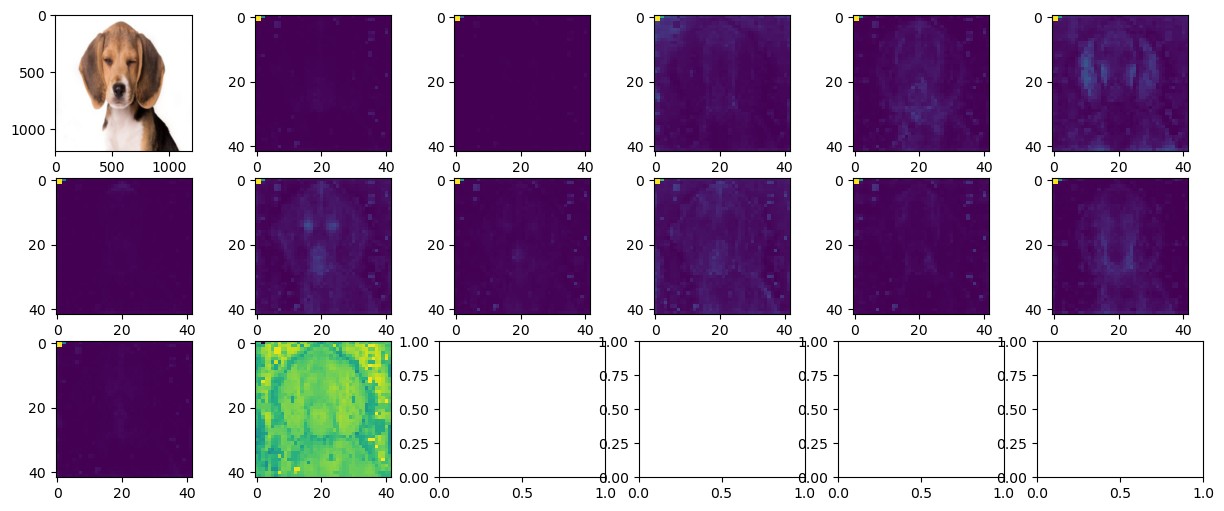

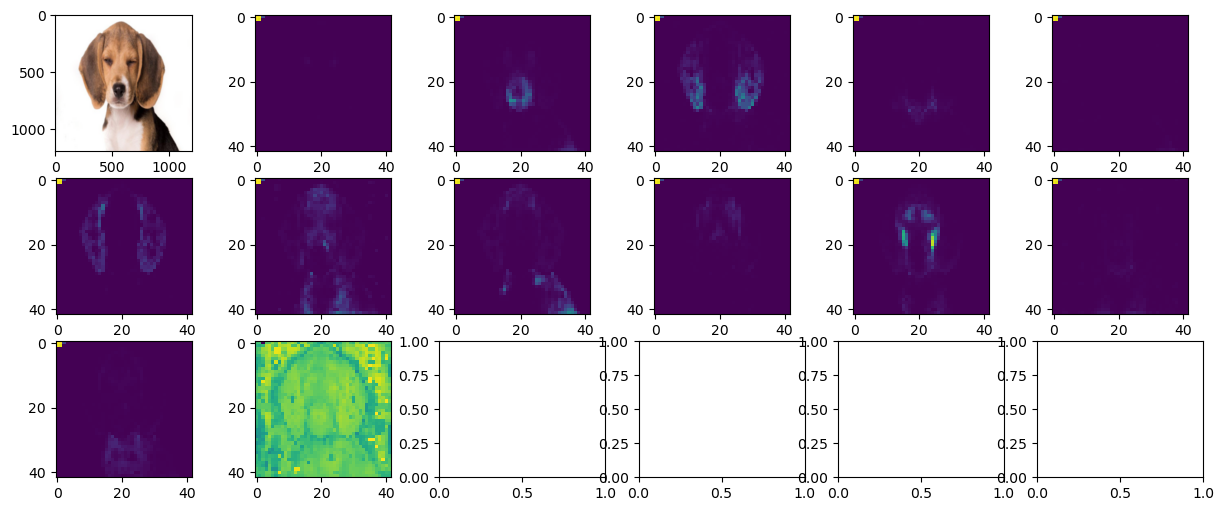

In [1]:
from plot_functions import plot_attention_map
lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.0, "cifar", 'CrossEntropyLoss', 0.0, 0.0, 128, 8, 0
model_name = "dinov2_vit_base"
model_param = {"patch_size": 14, "register": 0}
opt_param = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

raw_image, attention_maps, output_norm = plot_attention_map(model_param, opt_param)

In [3]:

from plot_functions import get_attr_eval
lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.0, "cifar", 'CrossEntropyLoss', 0.0, 0.0, 128, 8, 0
model_name = "dinov2_vit_base"
model_param, opt_param = {}, {}
model_param['dino'] = {"patch_size": 14, "register": 0}
opt_param['dino'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

attn_path = get_attr_eval('dino', model_param, opt_param, 'attention_path')

[1, 2, 3, 43, 44, 85, 87, 127, 129, 169, 171, 211, 213, 225, 253, 255, 295, 337, 883, 885, 925, 927, 958, 967, 1009, 1011, 1051, 1053, 1093, 1095, 1135, 1137, 1177, 1179, 1219, 1221, 1261, 1263, 1303, 1305, 1345, 1471, 1473, 1513, 1515, 1555, 1597, 1599, 1639, 1681, 1683, 1723, 1725, 1726]
54


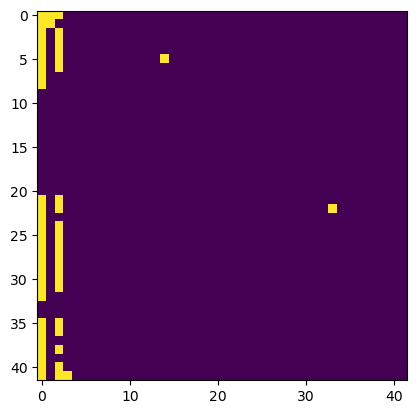

In [29]:
import matplotlib.pyplot as plt
import numpy as np
def get_key(graph):
    key_list = [*graph]
    for key in graph:
        key_list += get_key(graph[key])
    return key_list

key_list = list(set(get_key(attn_path)))
key_list.sort()
print(key_list)
print(len(key_list))
size = 42
attn_map = np.zeros(1+size*size)
attn_map[key_list] = 1
plt.imshow(attn_map[1:].reshape(size, size))

[1, 2, 3, 4, 5, 6, 7, 43, 44, 45, 46, 47, 48, 85, 86, 87, 88, 89, 127, 128, 129, 130, 131, 169, 170, 171, 211, 212, 213, 225, 253, 255, 295, 296, 297, 337, 338, 339, 340, 379, 380, 381, 382, 421, 422, 423, 463, 464, 465, 505, 506, 507, 547, 757, 758, 759, 799, 800, 801, 802, 841, 842, 843, 844, 883, 884, 885, 886, 916, 925, 926, 927, 958, 967, 968, 969, 1009, 1010, 1011, 1012, 1051, 1052, 1053, 1054, 1093, 1094, 1095, 1096, 1135, 1136, 1137, 1138, 1139, 1140, 1177, 1178, 1179, 1180, 1181, 1219, 1220, 1221, 1222, 1223, 1224, 1261, 1262, 1263, 1264, 1265, 1303, 1304, 1305, 1306, 1345, 1346, 1347, 1348, 1387, 1388, 1389, 1429, 1430, 1431, 1471, 1473, 1513, 1514, 1515, 1516, 1555, 1556, 1557, 1558, 1559, 1560, 1597, 1598, 1599, 1600, 1601, 1602, 1606, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1723, 1724, 1725, 1726, 1727, 1728, 1729]
169


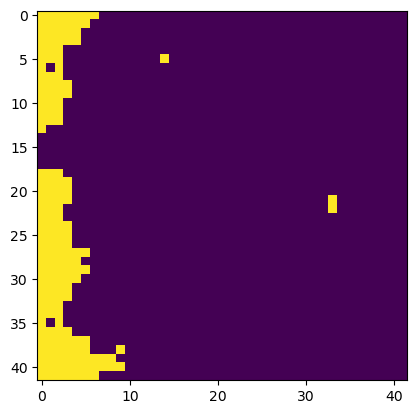

In [2]:
import matplotlib.pyplot as plt
import numpy as np
def get_key(graph):
    key_list = [*graph]
    for key in graph:
        key_list += get_key(graph[key])
    return key_list

key_list = list(set(get_key(attn_path)))
key_list.sort()
print(key_list)
print(len(key_list))
size = 42
attn_map = np.zeros(1+size*size)
attn_map[key_list] = 1
plt.imshow(attn_map[1:].reshape(size, size))

[1, 2, 39, 40, 41, 42, 43, 44, 45, 62, 63, 64, 84, 85, 103, 104, 106, 107, 108, 123, 126, 127, 141, 143, 144, 145, 151, 164, 165, 166, 168, 169, 184, 185, 190, 194, 196, 211, 224, 226, 233, 238, 265, 266, 268, 278, 281, 282, 307, 309, 310, 323, 324, 325, 336, 348, 350, 354, 358, 360, 366, 367, 368, 378, 390, 397, 402, 404, 407, 409, 410, 420, 430, 431, 436, 438, 445, 452, 453, 472, 473, 475, 476, 480, 487, 493, 494, 495, 513, 514, 521, 522, 523, 524, 527, 529, 532, 537, 538, 555, 558, 563, 564, 574, 579, 580, 596, 597, 599, 601, 604, 605, 606, 607, 612, 613, 616, 617, 620, 622, 627, 630, 638, 643, 646, 647, 648, 650, 652, 653, 654, 655, 662, 665, 672, 680, 683, 690, 697, 700, 704, 722, 726, 730, 736, 738, 744, 745, 748, 764, 765, 772, 775, 776, 778, 779, 781, 783, 784, 785, 787, 791, 798, 799, 800, 802, 807, 808, 815, 816, 817, 818, 819, 820, 821, 822, 823, 825, 827, 829, 832, 837, 840, 841, 849, 852, 856, 859, 861, 862, 863, 864, 865, 869, 870, 873, 874, 878, 879, 882, 883, 891, 897, 

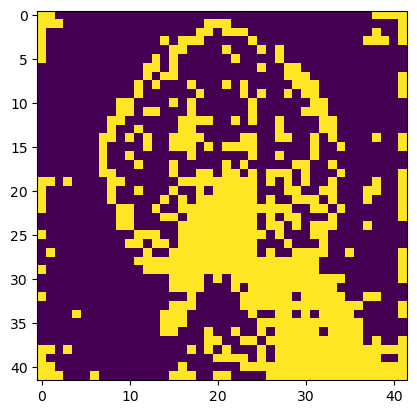

In [4]:
import matplotlib.pyplot as plt
import numpy as np
key_list = {}
def get_key(graph, layer):
    if layer in key_list:
        key_list[layer] += [*graph]
    else:
        key_list[layer] = [*graph]
    for key in graph:
        get_key(graph[key], layer+1)

size, layer = 42, 12
attn_map = np.zeros(layer, 1+size*size)
get_key(attn_path, 0)
for i in key_list:
    key_list[i] = list(set(key_list[i]))
    key_list[i].sort()
    attn_map[key_list] = i / layer
#print(key_list)
#print(len(key_list))

plt.imshow(attn_map[1:].reshape(size, size))

In [26]:
42*42

1764

In [3]:
attention_maps.shape

(12, 42, 42)

In [3]:
import numpy as np
print([np.argmax(attention_maps[-2][j].reshape(-1)) for j in range(12)])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 43, 0, 0]


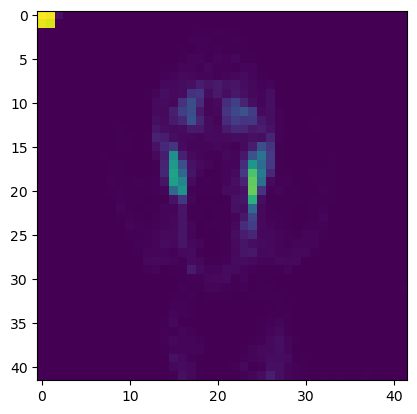

In [11]:
import matplotlib.pyplot as plt
plt.imshow(attention_maps[-1][-3])

In [8]:
attention_maps[-2][-3].reshape(-1)

array([0.01939095, 0.01920095, 0.00635246, ..., 0.00021209, 0.00023551,
       0.00040312], dtype=float32)

In [7]:
attention_maps[-2][-3].reshape(-1)[43]

0.019638652

In [14]:
attention_maps[-1][0].reshape(-1).shape

(42,)

In [ ]:
i

results/cifar/CrossEntropyLoss/sgd/dinov2_vit_base/patch_size_14/register_0/lr_0.0/moment_0.0/wd_0.0/batch_size_128/epoch_0/run_0/
[ 0  1  2  3  4  5  6  7  8  9 10 11]


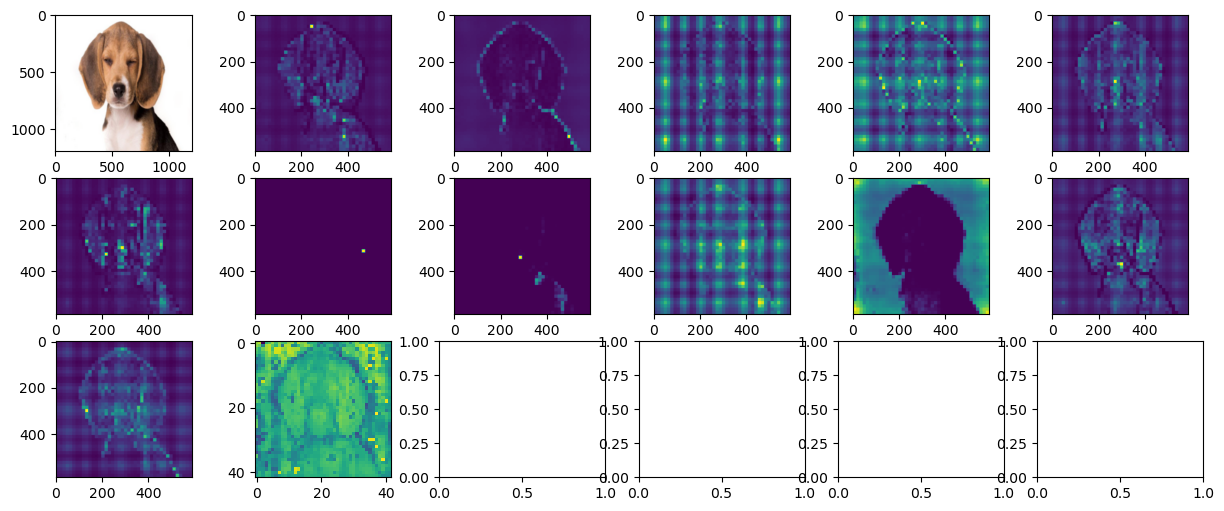

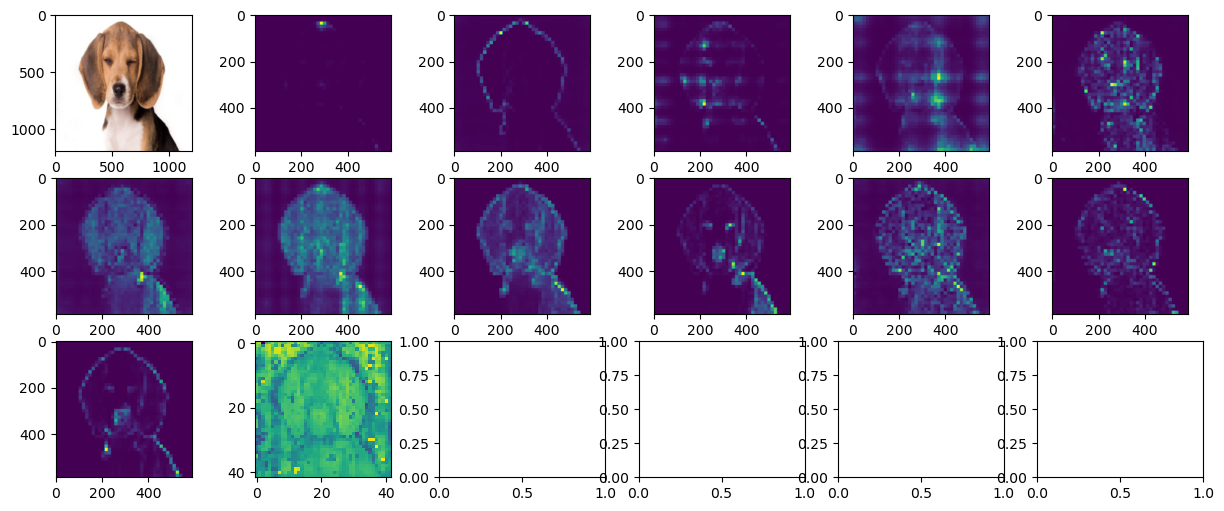

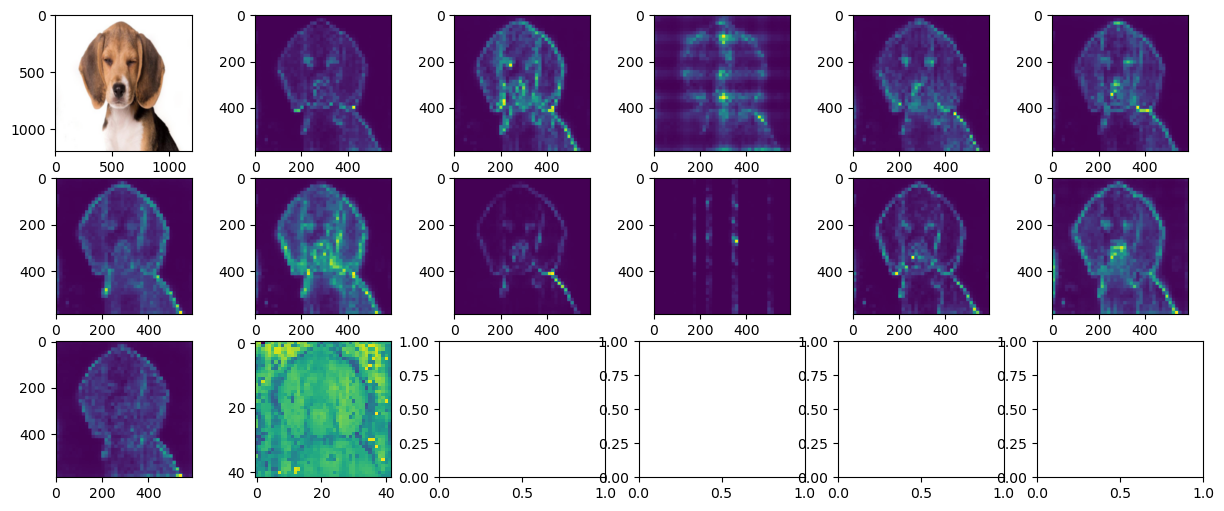

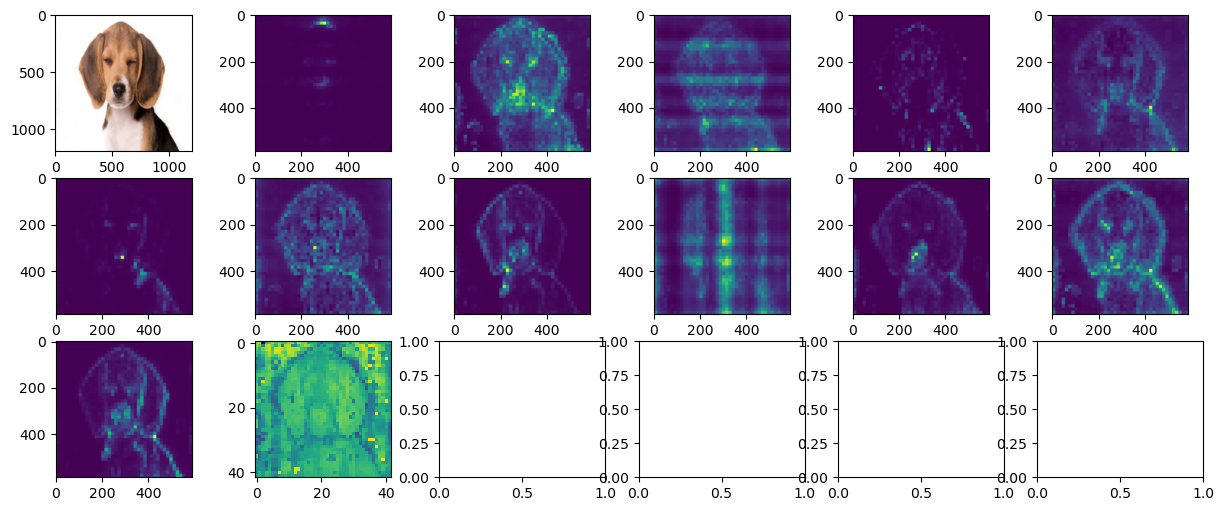

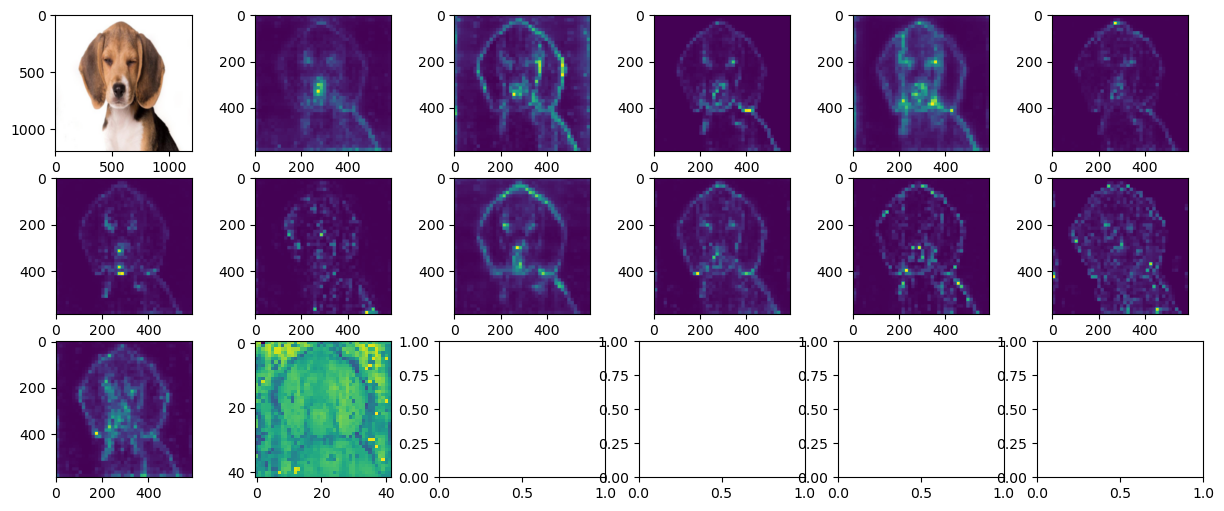

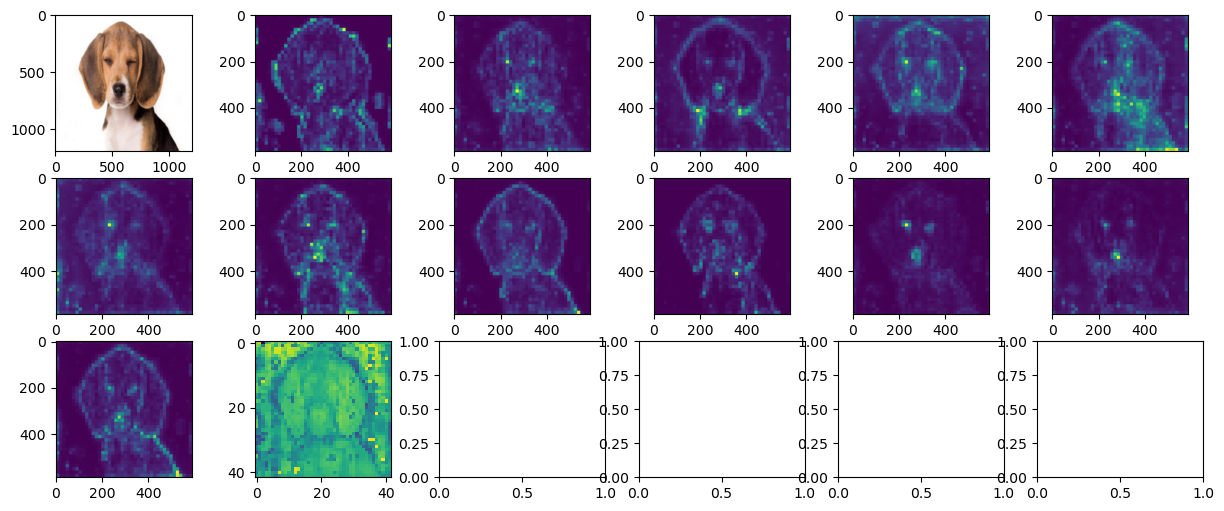

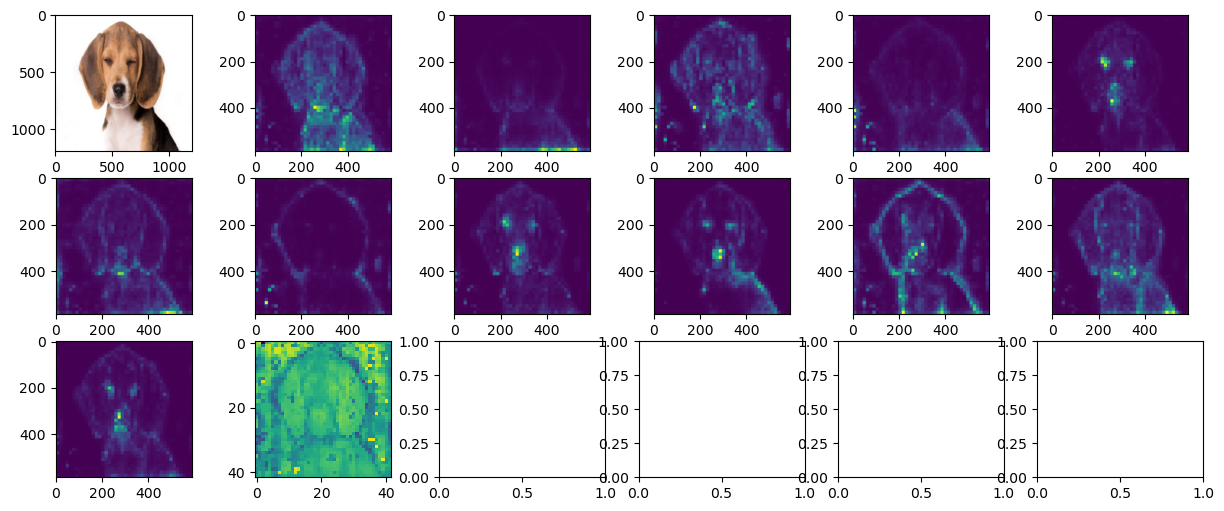

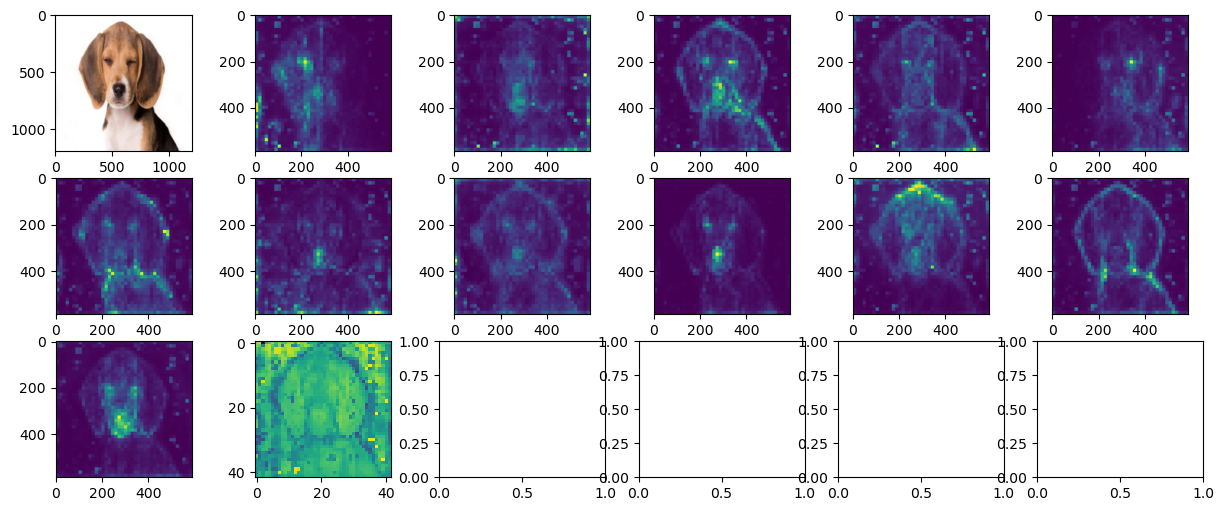

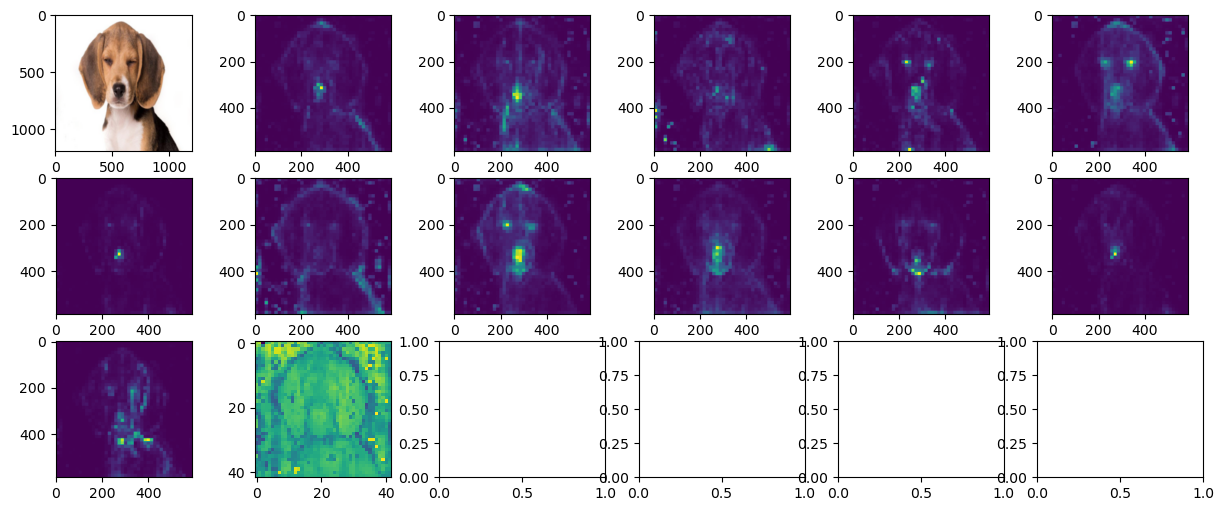

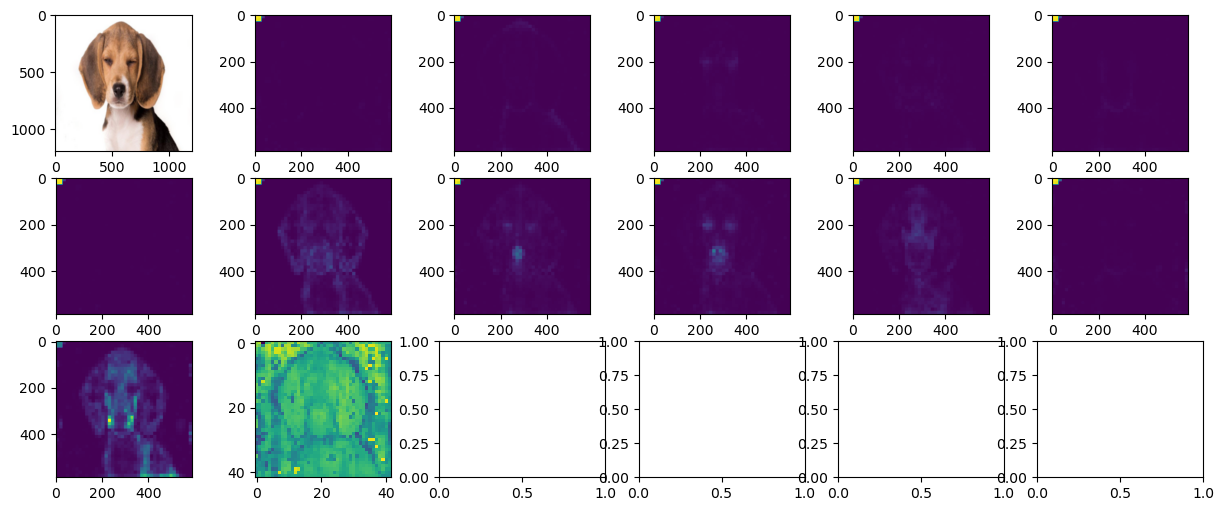

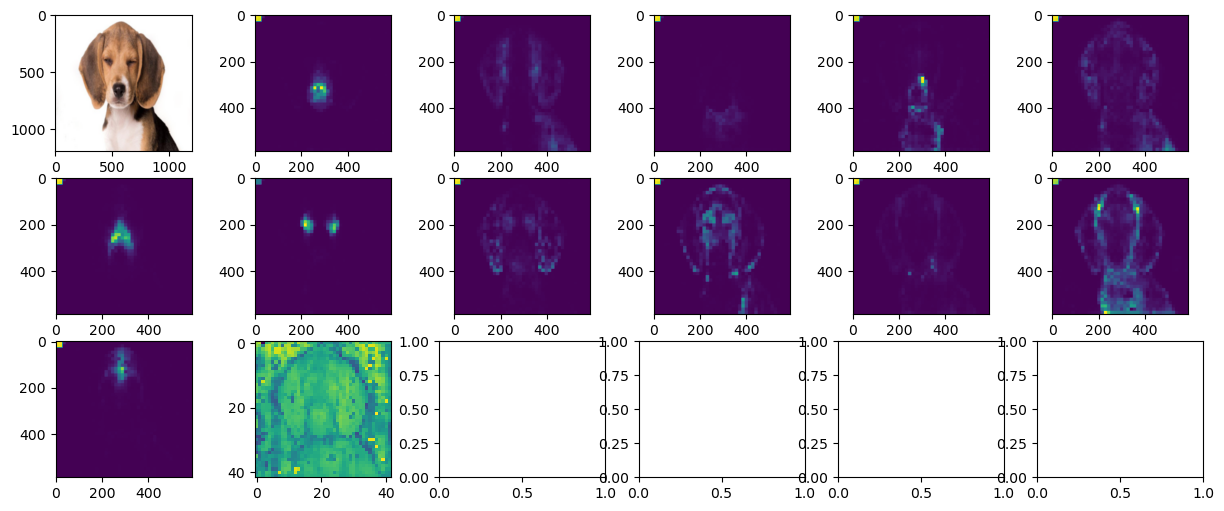

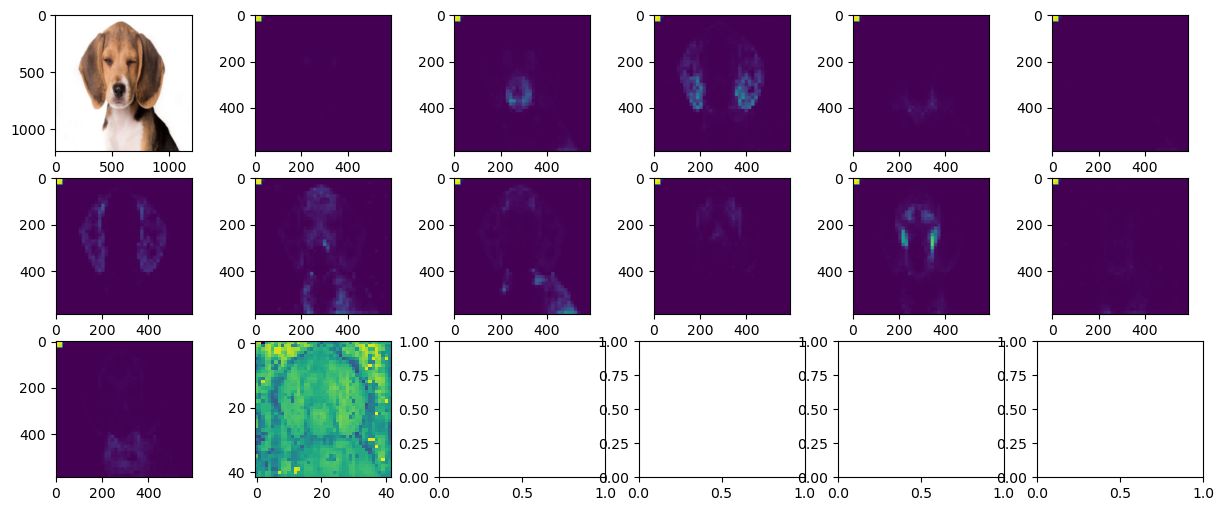

In [4]:
from plot_functions import plot_attention_map
lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.0, "cifar", 'CrossEntropyLoss', 0.0, 0.0, 128, 8, 0
model_name = "dinov2_vit_base"
model_param = {"patch_size": 14, "register": 0}
opt_param = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

raw_image, attention_maps, output_norm = plot_attention_map(model_param, opt_param)

(array([  1.,   0.,   0.,   0.,   3.,  50., 604., 752., 344.,  10.]),
 array([30.58614922, 33.20601597, 35.82588272, 38.44574947, 41.06561623,
        43.68548298, 46.30534973, 48.92521648, 51.54508324, 54.16494999,
        56.78481674]),
 <BarContainer object of 10 artists>)

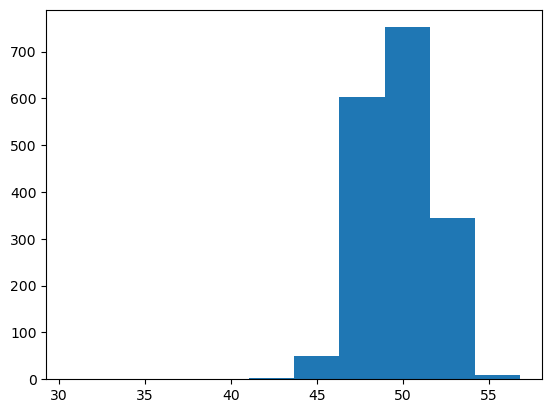

In [6]:
import numpy as np
import matplotlib.pyplot as plt
np.array(output_norm).shape
plt.hist(np.array(output_norm).reshape(-1))

In [33]:
import numpy as np
print(np.sum(attention_maps[0]))
print(np.max(attention_maps[0]))

195.89384
0.0008888322


(array([3.44764e+05, 0.00000e+00, 0.00000e+00, 1.96000e+02, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 7.84000e+02]),
 array([7.61569993e-07, 2.04127431e-02, 4.08247262e-02, 6.12367056e-02,
        8.16486850e-02, 1.02060668e-01, 1.22472651e-01, 1.42884627e-01,
        1.63296610e-01, 1.83708593e-01, 2.04120576e-01]),
 <BarContainer object of 10 artists>)

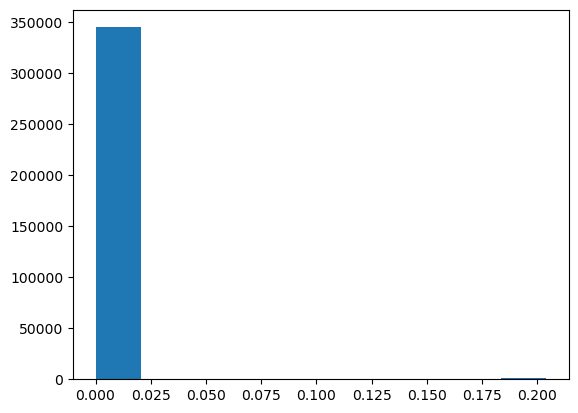

In [7]:
import matplotlib.pyplot as plt
plt.hist(attention_maps[0].reshape(-1))

In [21]:
attention_maps[0].shape

(350, 350)

results/cifar/CrossEntropyLoss/sgd/dinov2_vit_base/patch_size_14/register_4/lr_0.0/moment_0.0/wd_0.0/batch_size_128/epoch_0/run_0/
[0]


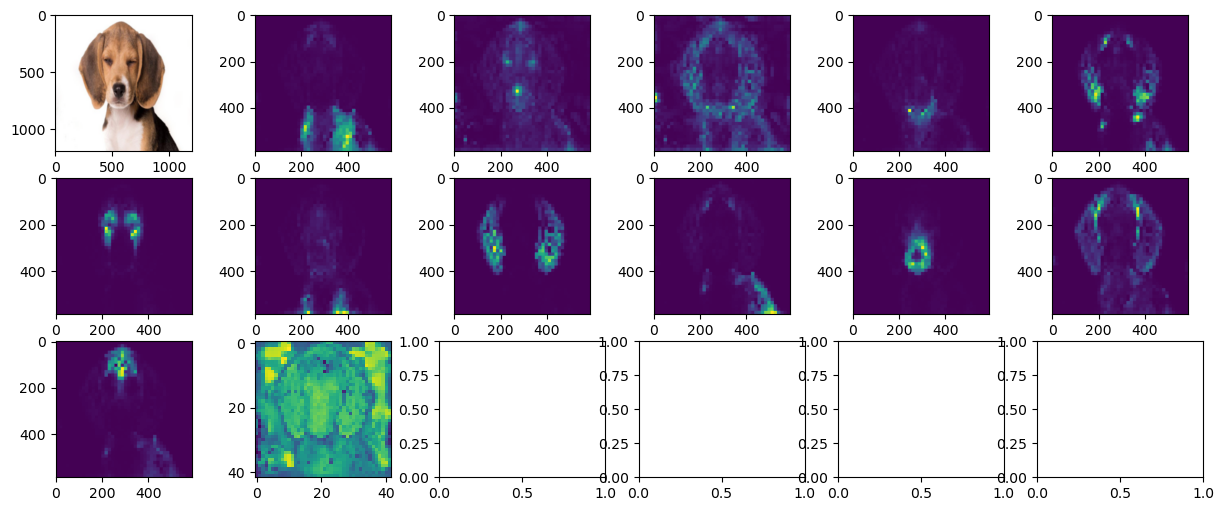

In [3]:
from plot_functions import plot_attention_map
lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.0, "cifar", 'CrossEntropyLoss', 0.0, 0.0, 128, 8, 0
model_name = "dinov2_vit_base"
model_param = {"patch_size": 14, "register": 4}
opt_param = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

raw_image, attention_maps, output_norm = plot_attention_map(model_param, opt_param)

results/cifar/CrossEntropyLoss/sgd/dinov2_vit_giant2/patch_size_14/register_0/lr_0.0/moment_0.0/wd_0.0/batch_size_128/epoch_0/run_0/
[0]


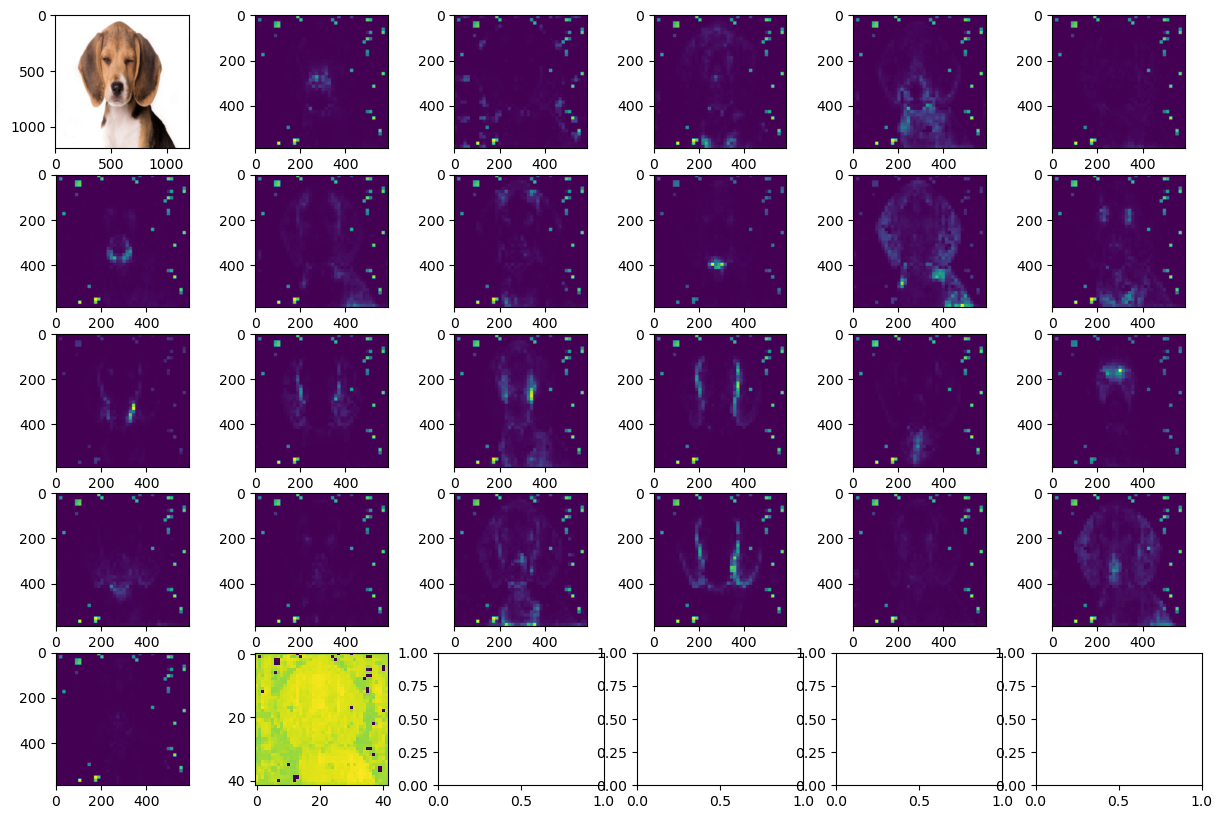

In [8]:
from plot_functions import plot_attention_map
lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.0, "cifar", 'CrossEntropyLoss', 0.0, 0.0, 128, 8, 0
model_name = "dinov2_vit_giant2"
model_param = {"patch_size": 14, "register": 0}
opt_param = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

raw_image, attention_maps, output_norm = plot_attention_map(model_param, opt_param)

(array([  37.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  550.,
        1177.]),
 array([19.05587578, 23.35154133, 27.64720688, 31.94287243, 36.23853798,
        40.53420353, 44.82986908, 49.12553463, 53.42120018, 57.71686573,
        62.01253128]),
 <BarContainer object of 10 artists>)

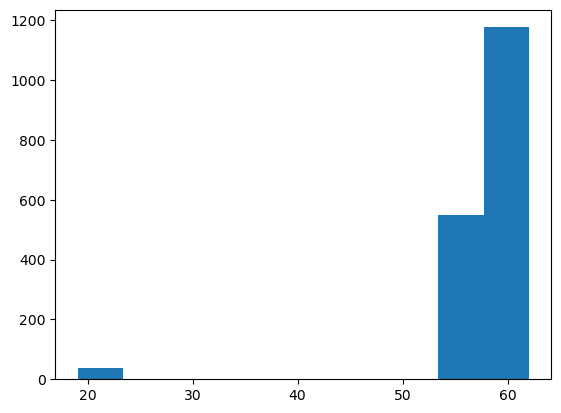

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(np.array(output_norm).reshape(-1))

In [ ]:
! python main.py --dataset cifar --model dinov2_vit_giant2 --loss CrossEntropyLoss --opt sgd --lr 0.0 --epoch 0 --analysis attention_map --batch_size 128 --momentum 0.0 --weight_decay 0.0 --no_train --do_eval --vit_patch_size 14 --num_register 4

results/cifar/CrossEntropyLoss/sgd/dinov2_vit_giant2/patch_size_14/register_4/lr_0.0/moment_0.0/wd_0.0/batch_size_128/epoch_0/run_0/
[0]


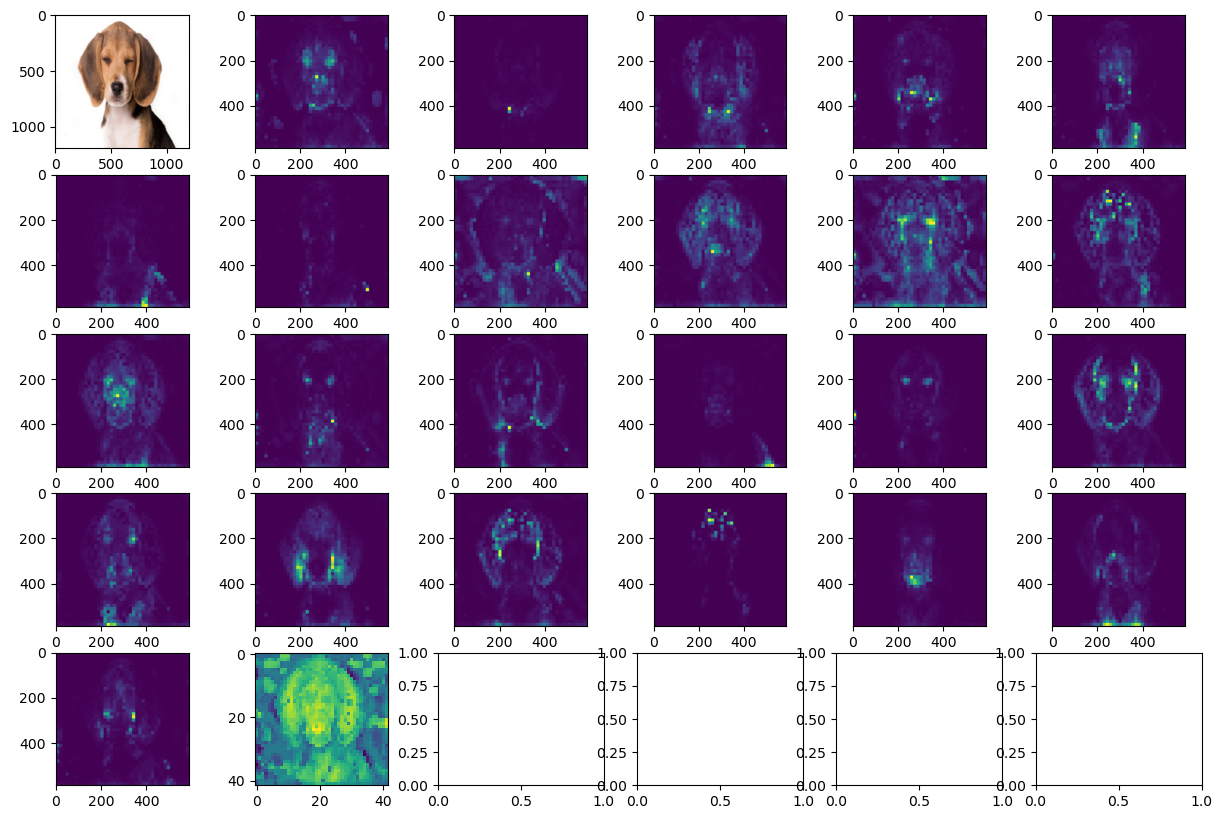

In [7]:
from plot_functions import plot_attention_map
lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.0, "cifar", 'CrossEntropyLoss', 0.0, 0.0, 128, 8, 0
model_name = "dinov2_vit_giant2"
model_param = {"patch_size": 14, "register": 4}
opt_param = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

raw_image, attention_maps, output_norm = plot_attention_map(model_param, opt_param)